In [2]:
import pandas as pd
import numpy as np
import datetime
import matplotlib.pyplot as plt
med_appt = pd.read_csv('https://raw.githubusercontent.com/zoeyyzh/springboard/main/KaggleV2-May-2016.csv')
med_appt

,PatientId,AppointmentID,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received,No-show
0,2.987250e+13,5642903,F,2016-04-29T18:38:08Z,2016-04-29T00:00:00Z,62,JARDIM DA PENHA,0,1,0,0,0,0,No
1,5.589978e+14,5642503,M,2016-04-29T16:08:27Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,0,0,0,0,0,No
2,4.262962e+12,5642549,F,2016-04-29T16:19:04Z,2016-04-29T00:00:00Z,62,MATA DA PRAIA,0,0,0,0,0,0,No
3,8.679512e+11,5642828,F,2016-04-29T17:29:31Z,2016-04-29T00:00:00Z,8,PONTAL DE CAMBURI,0,0,0,0,0,0,No
4,8.841186e+12,5642494,F,2016-04-29T16:07:23Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,1,1,0,0,0,No
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
110522,2.572134e+12,5651768,F,2016-05-03T09:15:35Z,2016-06-07T00:00:00Z,56,MARIA ORTIZ,0,0,0,0,0,1,No
110523,3.596266e+12,5650093,F,2016-05-03T07:27:33Z,2016-06-07T00:00:00Z,51,MARIA ORTIZ,0,0,0,0,0,1,No
110524,1.557663e+13,5630692,F,2016-04-27T16:03:52Z,2016-06-07T00:00:00Z,21,MARIA ORTIZ,0,0,0,0,0,1,No
110525,9.213493e+13,5630323,F,2016-04-27T15:09:23Z,2016-06-07T00:00:00Z,38,MARIA ORTIZ,0,0,0,0,0,1,No


In [3]:
med_appt.shape

(110527, 14)

In [4]:
missing = pd.concat([med_appt.isnull().sum(), 100 * med_appt.isnull().mean()], axis=1)
missing.columns=['count', '%']
missing.sort_values(by='count', ascending=False)

,count,%
PatientId,0,0.0
AppointmentID,0,0.0
Gender,0,0.0
ScheduledDay,0,0.0
AppointmentDay,0,0.0
Age,0,0.0
Neighbourhood,0,0.0
Scholarship,0,0.0
Hipertension,0,0.0
Diabetes,0,0.0


In [5]:
#no missing values

In [6]:
med_appt.info

<bound method DataFrame.info of            PatientId  AppointmentID Gender          ScheduledDay  \
0       2.987250e+13        5642903      F  2016-04-29T18:38:08Z   
1       5.589978e+14        5642503      M  2016-04-29T16:08:27Z   
2       4.262962e+12        5642549      F  2016-04-29T16:19:04Z   
3       8.679512e+11        5642828      F  2016-04-29T17:29:31Z   
4       8.841186e+12        5642494      F  2016-04-29T16:07:23Z   
...              ...            ...    ...                   ...   
110522  2.572134e+12        5651768      F  2016-05-03T09:15:35Z   
110523  3.596266e+12        5650093      F  2016-05-03T07:27:33Z   
110524  1.557663e+13        5630692      F  2016-04-27T16:03:52Z   
110525  9.213493e+13        5630323      F  2016-04-27T15:09:23Z   
110526  3.775115e+14        5629448      F  2016-04-27T13:30:56Z   

              AppointmentDay  Age      Neighbourhood  Scholarship  \
0       2016-04-29T00:00:00Z   62    JARDIM DA PENHA            0   
1       2016-

In [7]:
# Drop 'PatientId' and 'AppointmentID' as they are not needed.
med_appt.drop(['PatientId', 'AppointmentID'], axis=1, inplace=True)

In [8]:
med_appt.head()

,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received,No-show
0,F,2016-04-29T18:38:08Z,2016-04-29T00:00:00Z,62,JARDIM DA PENHA,0,1,0,0,0,0,No
1,M,2016-04-29T16:08:27Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,0,0,0,0,0,No
2,F,2016-04-29T16:19:04Z,2016-04-29T00:00:00Z,62,MATA DA PRAIA,0,0,0,0,0,0,No
3,F,2016-04-29T17:29:31Z,2016-04-29T00:00:00Z,8,PONTAL DE CAMBURI,0,0,0,0,0,0,No
4,F,2016-04-29T16:07:23Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,1,1,0,0,0,No


In [9]:
#correct typo in column names
med_appt.rename(columns = {'Hipertension': 'Hypertension',
                         'Handcap': 'Handicap','No-show': 'No_show'}, inplace = True)

In [10]:
# Convert ScheduledDay and AppointmentDay to 'datetime64[ns]'
med_appt['ScheduledDay'] = pd.to_datetime(med_appt['ScheduledDay']).dt.date.astype('datetime64[ns]')
med_appt['AppointmentDay'] = pd.to_datetime(med_appt['AppointmentDay']).dt.date.astype('datetime64[ns]')

In [11]:
med_appt.head()

,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hypertension,Diabetes,Alcoholism,Handicap,SMS_received,No_show
0,F,2016-04-29,2016-04-29,62,JARDIM DA PENHA,0,1,0,0,0,0,No
1,M,2016-04-29,2016-04-29,56,JARDIM DA PENHA,0,0,0,0,0,0,No
2,F,2016-04-29,2016-04-29,62,MATA DA PRAIA,0,0,0,0,0,0,No
3,F,2016-04-29,2016-04-29,8,PONTAL DE CAMBURI,0,0,0,0,0,0,No
4,F,2016-04-29,2016-04-29,56,JARDIM DA PENHA,0,1,1,0,0,0,No


In [12]:
# get the days of week for appointment day
med_appt['DaysOfWeek'] = med_appt['AppointmentDay'].dt.day_name()

In [13]:
# get the Waiting Time in Days
med_appt['Waiting_Time_days'] = med_appt['AppointmentDay'] - med_appt['ScheduledDay']
med_appt['Waiting_Time_days'] = med_appt['Waiting_Time_days'].dt.days

In [14]:
med_appt.tail()

,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hypertension,Diabetes,Alcoholism,Handicap,SMS_received,No_show,DaysOfWeek,Waiting_Time_days
110522,F,2016-05-03,2016-06-07,56,MARIA ORTIZ,0,0,0,0,0,1,No,Tuesday,35
110523,F,2016-05-03,2016-06-07,51,MARIA ORTIZ,0,0,0,0,0,1,No,Tuesday,35
110524,F,2016-04-27,2016-06-07,21,MARIA ORTIZ,0,0,0,0,0,1,No,Tuesday,41
110525,F,2016-04-27,2016-06-07,38,MARIA ORTIZ,0,0,0,0,0,1,No,Tuesday,41
110526,F,2016-04-27,2016-06-07,54,MARIA ORTIZ,0,0,0,0,0,1,No,Tuesday,41


In [15]:
med_appt.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 110527 entries, 0 to 110526
Data columns (total 14 columns):
 #   Column             Non-Null Count   Dtype         
---  ------             --------------   -----         
 0   Gender             110527 non-null  object        
 1   ScheduledDay       110527 non-null  datetime64[ns]
 2   AppointmentDay     110527 non-null  datetime64[ns]
 3   Age                110527 non-null  int64         
 4   Neighbourhood      110527 non-null  object        
 5   Scholarship        110527 non-null  int64         
 6   Hypertension       110527 non-null  int64         
 7   Diabetes           110527 non-null  int64         
 8   Alcoholism         110527 non-null  int64         
 9   Handicap           110527 non-null  int64         
 10  SMS_received       110527 non-null  int64         
 11  No_show            110527 non-null  object        
 12  DaysOfWeek         110527 non-null  object        
 13  Waiting_Time_days  110527 non-null  int64   

In [16]:
# print unique values of each col
print('Gender:',med_appt.Gender.unique())
print('Age:',sorted(med_appt.Age.unique()))
print('Neighbourhood:',med_appt.Neighbourhood.unique())
print('Scholarship:',med_appt.Scholarship.unique())
print('Hypertension:',med_appt.Hypertension.unique())
print('Diabetes:',med_appt.Diabetes.unique())
print('Alcoholism:',med_appt.Alcoholism.unique())
print('Handicap:',med_appt.Handicap.unique())
print('SMS_Received:',med_appt.SMS_received.unique())
print('No_show:',med_appt.No_show.unique())
print('DaysOfWeek:',med_appt.DaysOfWeek.unique())
print('Waiting_Time_days:',sorted(med_appt.Waiting_Time_days.unique()))

Gender: ['F' 'M']
Age: [-1, 0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68, 69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84, 85, 86, 87, 88, 89, 90, 91, 92, 93, 94, 95, 96, 97, 98, 99, 100, 102, 115]
Neighbourhood: ['JARDIM DA PENHA' 'MATA DA PRAIA' 'PONTAL DE CAMBURI' 'REPÚBLICA'
 'GOIABEIRAS' 'ANDORINHAS' 'CONQUISTA' 'NOVA PALESTINA' 'DA PENHA'
 'TABUAZEIRO' 'BENTO FERREIRA' 'SÃO PEDRO' 'SANTA MARTHA' 'SÃO CRISTÓVÃO'
 'MARUÍPE' 'GRANDE VITÓRIA' 'SÃO BENEDITO' 'ILHA DAS CAIEIRAS'
 'SANTO ANDRÉ' 'SOLON BORGES' 'BONFIM' 'JARDIM CAMBURI' 'MARIA ORTIZ'
 'JABOUR' 'ANTÔNIO HONÓRIO' 'RESISTÊNCIA' 'ILHA DE SANTA MARIA'
 'JUCUTUQUARA' 'MONTE BELO' 'MÁRIO CYPRESTE' 'SANTO ANTÔNIO' 'BELA VISTA'
 'PRAIA DO SUÁ' 'SANTA HELENA' 'ITARARÉ' 'INHANGUETÁ' 'UNIVERSITÁRIO'
 'S

<AxesSubplot:ylabel='Waiting_Time_days'>

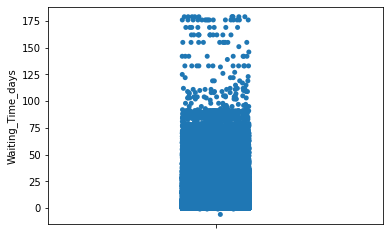

In [17]:
import seaborn as sns
sns.stripplot(data = med_appt, y = 'Waiting_Time_days', jitter = True)

In [18]:
# filter out outliers

med_appt = med_appt[(med_appt.Age >= 0) & (med_appt.Age <= 102)]
med_appt = med_appt[(med_appt.Waiting_Time_days >= 0)]

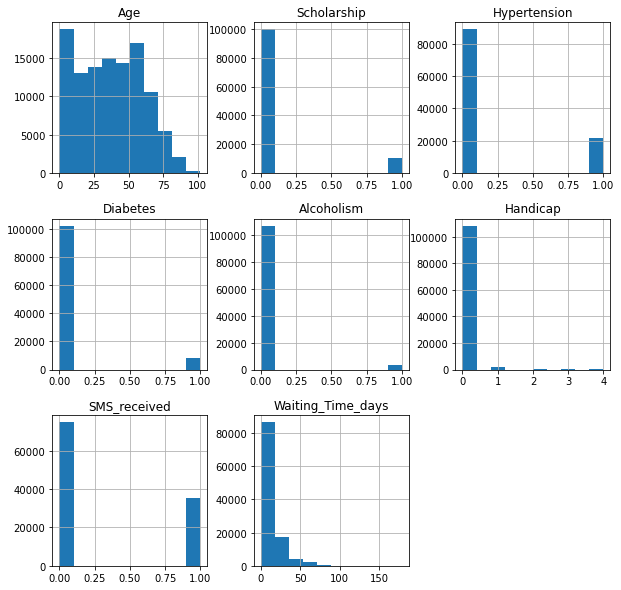

In [19]:
med_appt.hist(figsize=(10,10));

In [20]:
# calculate the probability of no-show with respect to age and waiting time
def probStatus(dataset, group_by):
    med_appt = pd.crosstab(index = dataset[group_by], columns = dataset.No_show).reset_index()
    med_appt['probNoShow'] = med_appt['Yes'] / (med_appt['No'] + med_appt['Yes'])
    return med_appt[[group_by, 'probNoShow']]

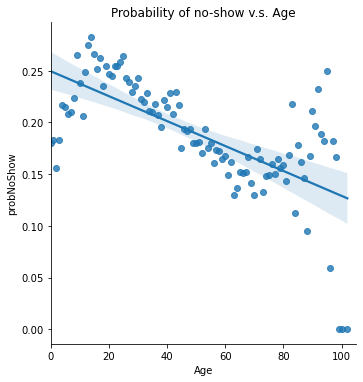

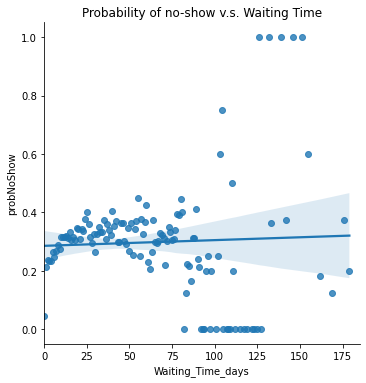

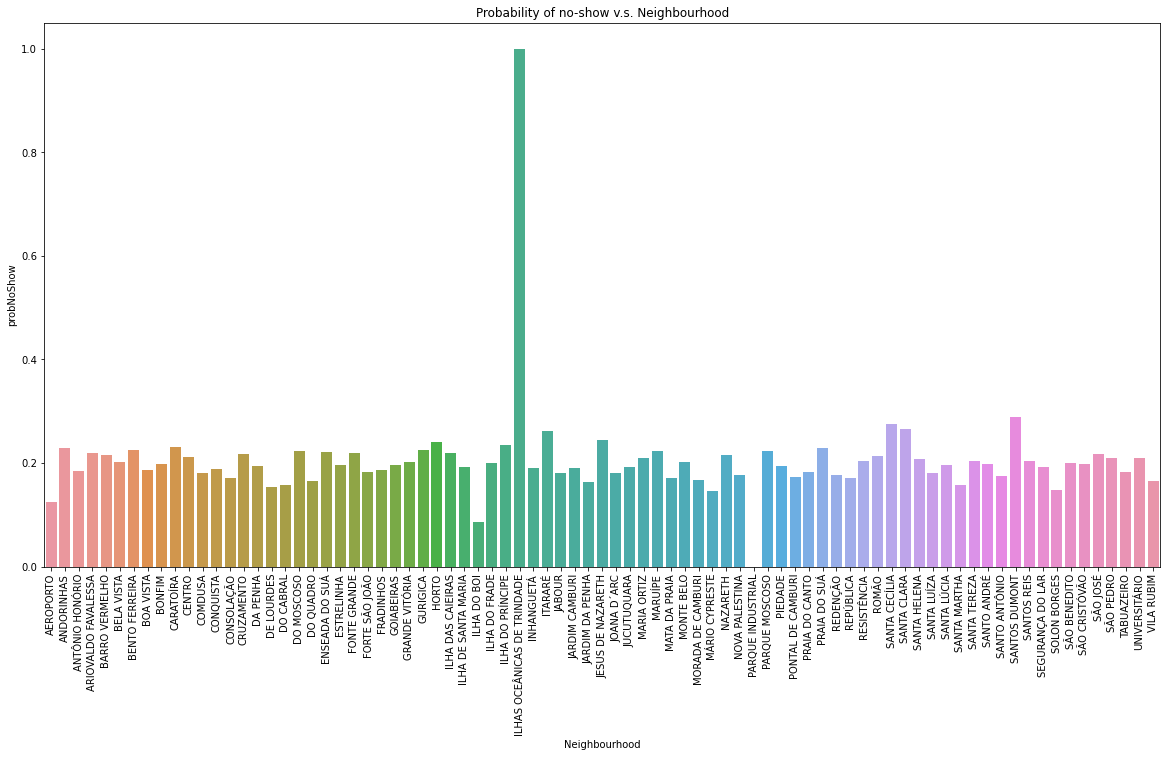

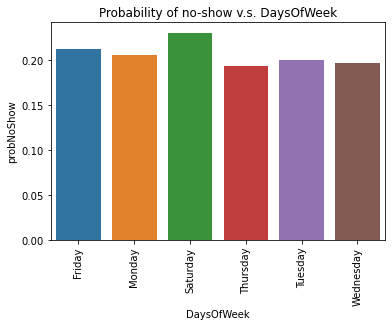

In [21]:
sns.lmplot(data = probStatus(med_appt, 'Age'), x = 'Age', y = 'probNoShow', fit_reg = True)
plt.xlim(0, 105)
plt.title('Probability of no-show v.s. Age')
plt.show()

sns.lmplot(data = probStatus(med_appt, 'Waiting_Time_days'), x = 'Waiting_Time_days', 
           y = 'probNoShow', fit_reg = True)
plt.title('Probability of no-show v.s. Waiting Time')
plt.xlim(0, 185)
plt.show()

plt.figure(figsize=(20,10))
sns.barplot(data = probStatus(med_appt, 'Neighbourhood'), x = 'Neighbourhood', 
           y = 'probNoShow')

plt.title('Probability of no-show v.s. Neighbourhood')
plt.xticks(rotation=90);
plt.show()

sns.barplot(data = probStatus(med_appt, 'DaysOfWeek'), x = 'DaysOfWeek', 
           y = 'probNoShow')

plt.title('Probability of no-show v.s. DaysOfWeek')
plt.xticks(rotation=90);
plt.show()


In [22]:
# Age
# probability of no show increases with age and reaches to the peak around age of 15, 
# starts to decrease till around 70, the diverge into 2 groups.
# conclusion: teenagers tend to not showing up to their appointment; elderlies not showing up may be due to their 
# loss of mobility

# Wait time: no correlation

# Neighbourhood: ILHA DAS CAIEIRAS stood out

# Days of week: Saturday has the highest no-show rate

In [23]:
med_appt.value_counts(subset='Neighbourhood')

Neighbourhood
JARDIM CAMBURI                 7717
MARIA ORTIZ                    5805
RESISTÊNCIA                    4430
JARDIM DA PENHA                3877
ITARARÉ                        3514
                               ... 
ILHA DO BOI                      35
ILHA DO FRADE                    10
AEROPORTO                         8
ILHAS OCEÂNICAS DE TRINDADE       2
PARQUE INDUSTRIAL                 1
Length: 81, dtype: int64

In [24]:
#ILHAS OCEÂNICAS DE TRINDADE only has 2 data points and both are noshows. That is why it stood out.

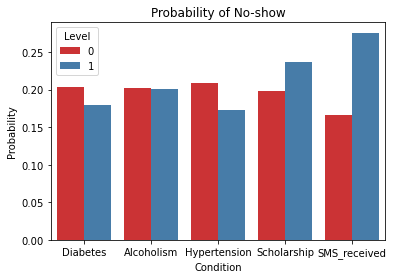

In [25]:
# Now we analyze the binarily coded categorical columns together
def probStatusCat(group_by):
    rows = []
    for item in group_by:
        for level in med_appt[item].unique():
            row = {'Condition': item}
            total = len(med_appt[med_appt[item] == level])
            n = len(med_appt[(med_appt[item] == level) & (med_appt.No_show == 'Yes')])
            row.update({'Level': level, 'Probability': n / total})
            rows.append(row)
    return pd.DataFrame(rows)


sns.barplot(data = probStatusCat(['Diabetes', 'Alcoholism', 'Hypertension','Scholarship', 'SMS_received']),
            x = 'Condition', y = 'Probability', hue = 'Level', palette = 'Set1')
plt.title('Probability of No-show')
plt.ylabel('Probability')
plt.show()

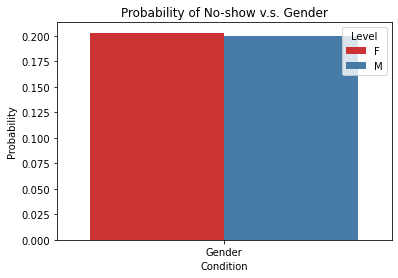

In [26]:
# Gender
sns.barplot(data = probStatusCat(['Gender']),
            x = 'Condition', y = 'Probability', hue = 'Level', palette = 'Set1')
plt.title('Probability of No-show v.s. Gender')
plt.ylabel('Probability')
plt.show()

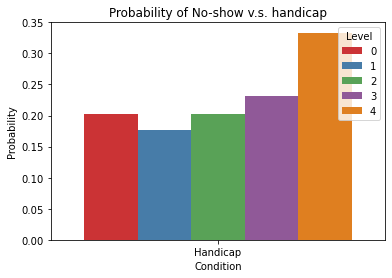

In [27]:
# Handicap
sns.barplot(data = probStatusCat(['Handicap']),
            x = 'Condition', y = 'Probability', hue = 'Level', palette = 'Set1')
plt.title('Probability of No-show v.s. handicap')
plt.ylabel('Probability')
plt.show()

In [28]:
med_appt.DaysOfWeek.replace(('Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday'), (1, 2, 3, 4, 5, 6, 7), inplace=True)

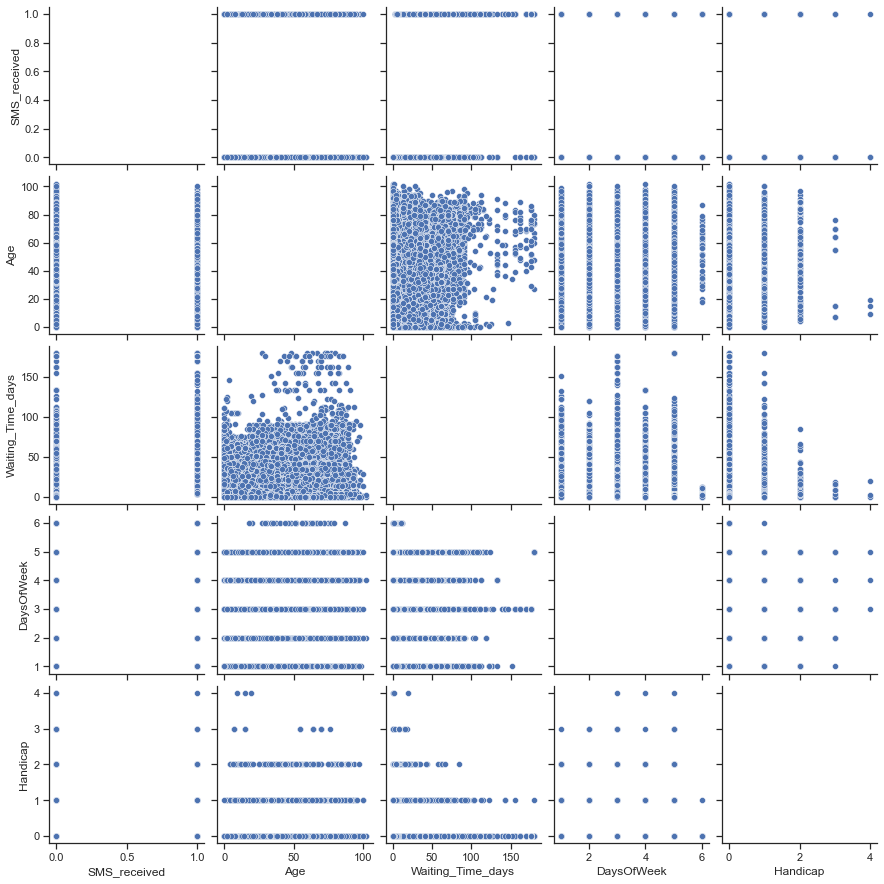

In [29]:
import seaborn as sns
sns.set_theme(style="ticks")
a = med_appt[['Gender','SMS_received','Age','Waiting_Time_days','DaysOfWeek','Neighbourhood','Handicap']]
sns.pairplot(a, kind='scatter', diag_kind='box')

In [30]:
obj_med_appt = med_appt.select_dtypes(include=['object']).copy()
obj_med_appt.head()

,Gender,Neighbourhood,No_show
0,F,JARDIM DA PENHA,No
1,M,JARDIM DA PENHA,No
2,F,MATA DA PRAIA,No
3,F,PONTAL DE CAMBURI,No
4,F,JARDIM DA PENHA,No


In [34]:
med_appt.Gender.replace(('M', 'F'), (0, 1), inplace=True)


TypeError: Cannot compare types 'ndarray(dtype=int64)' and 'str'

In [41]:
med_appt.No_show.replace(('No', 'Yes'), (0, 1), inplace=True)
med_appt.No_show.replace(('No', 'Yes'), (0, 1), inplace=True)

TypeError: Cannot compare types 'ndarray(dtype=int64)' and 'str'

In [42]:
med_appt.head()

,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hypertension,Diabetes,Alcoholism,Handicap,SMS_received,No_show,DaysOfWeek,Waiting_Time_days
0,1,2016-04-29,2016-04-29,62,JARDIM DA PENHA,0,1,0,0,0,0,0,5,0
1,0,2016-04-29,2016-04-29,56,JARDIM DA PENHA,0,0,0,0,0,0,0,5,0
2,1,2016-04-29,2016-04-29,62,MATA DA PRAIA,0,0,0,0,0,0,0,5,0
3,1,2016-04-29,2016-04-29,8,PONTAL DE CAMBURI,0,0,0,0,0,0,0,5,0
4,1,2016-04-29,2016-04-29,56,JARDIM DA PENHA,0,1,1,0,0,0,0,5,0


In [44]:
med_appt["Neighbourhood"] = med_appt["Neighbourhood"].astype('category')
med_appt["Neighbourhood"] = med_appt["Neighbourhood"].cat.codes
med_appt.head()

,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hypertension,Diabetes,Alcoholism,Handicap,SMS_received,No_show,DaysOfWeek,Waiting_Time_days
0,1,2016-04-29,2016-04-29,62,39,0,1,0,0,0,0,0,5,0
1,0,2016-04-29,2016-04-29,56,39,0,0,0,0,0,0,0,5,0
2,1,2016-04-29,2016-04-29,62,45,0,0,0,0,0,0,0,5,0
3,1,2016-04-29,2016-04-29,8,54,0,0,0,0,0,0,0,5,0
4,1,2016-04-29,2016-04-29,56,39,0,1,1,0,0,0,0,5,0


In [48]:
from sklearn.decomposition import PCA
patient_info = ['Gender', 'Age','Neighbourhood','Scholarship','Hypertension','Diabetes', 'Alcoholism', 'Handicap', 'SMS_received','DaysOfWeek','Waiting_Time_days']
x = med_appt.loc[:, patient_info].values
y = med_appt.loc[:, ['No_show']].values
pca = PCA(.95)
principalComponents = pca.fit_transform(x)
print(pca.n_components_)

3
